<a href="https://colab.research.google.com/github/AdamChoong0095/NUS-Stock-Data/blob/Shan-Li/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
import yfinance as yf

# Combined list of top 20 stocks by index weight of S&P500
top_20 = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'GOOGL', 'AVGO', 'BRK.B', 'GOOG', 'LLY', 'TSLA', 'JPM', 'UNH',"XOM","V","MA","HD","PG","COST","JNJ","WMT"]
industries = {}

# Get industry data
for stock in top_20:
    stocks = yf.Ticker(stock)
    industries[stock] = stocks.info.get('sector', 'N/A')

# Convert to DataFrame
industry_df = pd.DataFrame(list(industries.items()), columns=['Stock', 'Industry'])

# Create a DataFrame named 'data' with a column 'Stock'
data = pd.DataFrame({'Stock': top_20})

# Merge industry data with the main dataset
data_top_20 = pd.merge(data, industry_df, on='Stock', how='left')
# drop rows with industry = N/A
data_top_20 = data_top_20[data_top_20['Industry'] != 'N/A']
data_top_20.index = range(1, len(data_top_20) + 1)

print(data_top_20)

    Stock                Industry
1    AAPL              Technology
2    NVDA              Technology
3    MSFT              Technology
4    AMZN       Consumer Cyclical
5    META  Communication Services
6   GOOGL  Communication Services
7    AVGO              Technology
8    GOOG  Communication Services
9     LLY              Healthcare
10   TSLA       Consumer Cyclical
11    JPM      Financial Services
12    UNH              Healthcare
13    XOM                  Energy
14      V      Financial Services
15     MA      Financial Services
16     HD       Consumer Cyclical
17     PG      Consumer Defensive
18   COST      Consumer Defensive
19    JNJ              Healthcare
20    WMT      Consumer Defensive


In [7]:
# Choose stocks in top 4 sector weighting for SPY: Tehcnology, Financial Services, Healthcare, Consumer Cyclical Industry
# Stocks in Tehcnology Industry in top 20
tech_stocks = data_top_20[data_top_20['Industry'] == 'Technology']

# Stocks in Financial Services Industry in top 20
financial_services_stocks = data_top_20[data_top_20['Industry'] == 'Financial Services']

# Stocks in Healthcare Industry in top 20
healthcare_stocks = data_top_20[data_top_20['Industry'] == 'Healthcare']

# Stocks in Consumer Cyclical Industry in top 20
consumer_cyclical_stocks = data_top_20[data_top_20['Industry'] == 'Consumer Cyclical']

# Combine the dataframes
df_industries = pd.concat([tech_stocks, financial_services_stocks, healthcare_stocks, consumer_cyclical_stocks])

print(df_industries)

   Stock            Industry
1   AAPL          Technology
2   NVDA          Technology
3   MSFT          Technology
7   AVGO          Technology
11   JPM  Financial Services
14     V  Financial Services
15    MA  Financial Services
9    LLY          Healthcare
12   UNH          Healthcare
19   JNJ          Healthcare
4   AMZN   Consumer Cyclical
10  TSLA   Consumer Cyclical
16    HD   Consumer Cyclical


## EDA on Stocks from 2012-2017

#### Hypothesis 1: Correlation between Volume and Changes in Price
###### Strong correlation between trading volumes and percentage change in price based on **opening and closing prices**

In [8]:
stock_file = ["aapl.us.txt","nvda.us.txt","msft.us.txt","avgo.us.txt","jpm.us.txt","v.us.txt","ma.us.txt","lly.us.txt","unh.us.txt","jnj.us.txt","amzn.us.txt","tsla.us.txt","hd.us.txt"]
#check if all stocks have data from 2012-01-01 to 2017-31-12
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    print(f"Data for {file} starts from {stock['Date'].min()} to {stock['Date'].max()}")

Data for aapl.us.txt starts from 1984-09-07 to 2017-11-10
Data for nvda.us.txt starts from 1999-01-22 to 2017-11-10
Data for msft.us.txt starts from 1986-03-13 to 2017-11-10
Data for avgo.us.txt starts from 2009-08-05 to 2017-11-10
Data for jpm.us.txt starts from 1970-01-02 to 2017-11-10
Data for v.us.txt starts from 2008-03-18 to 2017-11-10
Data for ma.us.txt starts from 2006-05-24 to 2017-11-10
Data for lly.us.txt starts from 1982-01-04 to 2017-11-10
Data for unh.us.txt starts from 1990-03-26 to 2017-11-10
Data for jnj.us.txt starts from 1970-01-02 to 2017-11-10
Data for amzn.us.txt starts from 1997-05-16 to 2017-11-10
Data for tsla.us.txt starts from 2010-06-28 to 2017-11-10
Data for hd.us.txt starts from 1981-09-22 to 2017-11-10


In [16]:
# get correlation for all stocks
corr = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    missing_val = stock.isnull().sum()
    if missing_val.sum() > 0:
        print(f"Missing values in {file}")
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock[stock['Date'] >= '2012-01-01']
    stock['Change'] = np.abs(stock['Close'] - stock['Open']) / stock['Open'] * 100
    correlation = stock['Volume'].corr(stock['Change'])
    corr.append(correlation)

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# create a dataframe with stock name and correlation
correlation_df = pd.DataFrame(list(zip(stock_name, corr)), columns=['Stock', 'Correlation'])
print(correlation_df)

# calculate the average correlation
average_correlation = correlation_df['Correlation'].mean()
print(f'Average correlation coefficient: {average_correlation}')

   Stock  Correlation
0   AAPL     0.400988
1   NVDA     0.538714
2   MSFT     0.340079
3   AVGO     0.278454
4    JPM     0.411255
5      V     0.484639
6     MA     0.426571
7    LLY     0.349863
8    UNH     0.386934
9    JNJ     0.221023
10  AMZN     0.498021
11  TSLA     0.416072
12    HD     0.376451
Average correlation coefficient: 0.3945434098784558


#### Evaluation
- The average correlation coefficient is 0.3945, which indicates a weak correlation between trading volume and percentage change in stock price between 2012-2017 based on daily opening and closing prices.
- However, the use of daily opening and closing prices can overlook important price movements that occur throughout the trading day which can be influenced by news events, market sentiment or trading strategies.
- Intraday price movements may provide a better insight into the relationship between trading volume and stock price change as opening and closing prices may not reflect the accurate fluctuations in prices on certain trading days.


#### Hypothesis 2: Correlation between Volume and Changes in Price
###### Strong correlation between trading volumes and percentage change in price based on **intraday (high,low) prices**

In [18]:
# get correlation for all stocks
corr = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    missing_val = stock.isnull().sum()
    if missing_val.sum() > 0:
        print(f"Missing values in {file}")
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock[stock['Date'] >= '2012-01-01']
    stock['Change'] = np.abs(stock['High'] - stock['Low']) / stock['Low'] * 100
    correlation = stock['Volume'].corr(stock['Change'])
    corr.append(correlation)

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# create a dataframe with stock name and correlation
correlation_df = pd.DataFrame(list(zip(stock_name, corr)), columns=['Stock', 'Correlation'])
print(correlation_df)

# calculate the average correlation
average_correlation = correlation_df['Correlation'].mean()
print(f'Average correlation coefficient: {average_correlation}')

   Stock  Correlation
0   AAPL     0.540021
1   NVDA     0.695711
2   MSFT     0.460309
3   AVGO     0.431707
4    JPM     0.521096
5      V     0.615140
6     MA     0.567425
7    LLY     0.403938
8    UNH     0.526381
9    JNJ     0.320071
10  AMZN     0.663367
11  TSLA     0.555908
12    HD     0.399715
Average correlation coefficient: 0.515445185287468


#### Evaluation
- The average correlation coefficient has increased to 0.5154, which indicates a stronger correlation between trading volume and percentage change in stock price between 2012-2017 based on intraday trading prices.
- This shows that intraday price movements provide a more comprehensive view of the relationship between changes in stock prices and trading volume compared to opening and closing prices.
- For example, a stock might open at a certain price, spike or drop significantly during the day, and close at a price near the opening price. Using price change in opening and closing prices would fail to reflect the volatility of trading activity throughout the session.

#### Hypothesis 3: Price volatility across different industries
###### Stocks in the technology industry have higher volatility compared to other industries


In [11]:
# volatility is the std of a stock's annualised returns over a given period
# calculate votality for all stocks in the stock list
volatility = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    missing_val = stock.isnull().sum()
    if missing_val.sum() > 0:
        print(f"Missing values in {file}")
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock[stock['Date'] >= '2012-01-01']
    stock["Daily Return"]=stock["Close"].pct_change()*100
    stock['30 Day Volatility'] = stock['Daily Return'].rolling(window=30).std()
    stock = stock.dropna()
    stock['Annualised Volatility'] = stock['30 Day Volatility'] * np.sqrt(252)
    volatility.append(stock['Annualised Volatility'].mean())

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# create a dataframe with stock name, volatility and industry
volatility_df = pd.DataFrame(list(zip(stock_name, volatility)), columns=['Stock', 'Average Volatility'])
volatility_df = pd.merge(volatility_df, industry_df, on='Stock', how='left')
print(volatility_df)
print("---------------------------------------------------")

# calculate average volatility grouped by industry
average_volatility = volatility_df.groupby('Industry').mean("Average Volatility")
print(average_volatility.sort_values(by='Average Volatility', ascending=False))

   Stock  Average Volatility            Industry
0   AAPL           23.757373          Technology
1   NVDA           31.976923          Technology
2   MSFT           21.018287          Technology
3   AVGO           31.017728          Technology
4    JPM           20.746133  Financial Services
5      V           19.504303  Financial Services
6     MA           19.527640  Financial Services
7    LLY           19.214172          Healthcare
8    UNH           19.564913          Healthcare
9    JNJ           12.747311          Healthcare
10  AMZN           27.703466   Consumer Cyclical
11  TSLA           45.231854   Consumer Cyclical
12    HD           17.129285   Consumer Cyclical
---------------------------------------------------
                    Average Volatility
Industry                              
Consumer Cyclical            30.021535
Technology                   26.942578
Financial Services           19.926025
Healthcare                   17.175465


#### Evaluation
- `average_volatility` highlights the varying degrees of risk associated with investing in the chosen industries, with Consumer Cyclical being the most volatile and Healthcare the least.
- Broad market trends and global economic factors may have a greater impact on stock volatility than industry classification, highlighting the importance of diversification in a portfolio.
- Therefore, choosing SPY which has a broad market exposure, encompassing various sectors such as technology, healthcare, finance, etc. reduces the risk associated with individual sectors and ensures the dataset is a good representative of the stock market.


#### Hypothesis 4: Seasonal Patterns on Stock Prices
###### Best and worst months for the stock market from 2012-2017

In [12]:
# get the month for the highest avg price for all stocks in the stock list
max_month = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    stock = stock[stock['Date'] >= '2012-01-01']
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock['Month'] = stock['Date'].dt.month
    stock['Year'] = stock['Date'].dt.year
    average_price = stock.groupby(['Year', 'Month'])['High'].mean().reset_index()
    # get the maximum price for each year
    max_price = []
    for year in average_price['Year'].unique():
        max_price.append(average_price[average_price['Year'] == year].sort_values(by='High', ascending = False).head(1))
    max_price = pd.concat(max_price)
    # average the month column to get the best months across years
    best_month = max_price['Month'].mean().round(0).astype(int)
    max_month.append(best_month)

# add in quarter of the year based on max month
quarter = []
for month in max_month:
    if month in [1, 2, 3]:
        quarter.append('Q1')
    elif month in [4, 5, 6]:
        quarter.append('Q2')
    elif month in [7, 8, 9]:
        quarter.append('Q3')
    else:
        quarter.append('Q4')

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# get industry of stocks
industry = []
for stock in stock_name:
    industry.append(industries[stock])

# create a dataframe with stock name, month with highest average closing price and industry
max_month_df = pd.DataFrame(list(zip(stock_name, max_month, quarter, industry)), columns=['Stock', 'Month', "Quarter", 'Industry'])
max_month_df["Type"] = "Best"
print(max_month_df)

   Stock  Month Quarter            Industry  Type
0   AAPL     10      Q4          Technology  Best
1   NVDA     10      Q4          Technology  Best
2   MSFT     10      Q4          Technology  Best
3   AVGO     10      Q4          Technology  Best
4    JPM     10      Q4  Financial Services  Best
5      V     11      Q4  Financial Services  Best
6     MA     12      Q4  Financial Services  Best
7    LLY      8      Q3          Healthcare  Best
8    UNH     10      Q4          Healthcare  Best
9    JNJ     11      Q4          Healthcare  Best
10  AMZN      9      Q3   Consumer Cyclical  Best
11  TSLA      6      Q2   Consumer Cyclical  Best
12    HD     11      Q4   Consumer Cyclical  Best


In [13]:
# get the month for the lowest avg price for all stocks in the stock list
min_month = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    stock = stock[stock['Date'] >= '2012-01-01']
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock['Month'] = stock['Date'].dt.month
    stock['Year'] = stock['Date'].dt.year
    average_price = stock.groupby(['Year', 'Month'])['Low'].mean().reset_index()
    # get the minimum price for each year
    min_price = []
    for year in average_price['Year'].unique():
        min_price.append(average_price[average_price['Year'] == year].sort_values(by='Low').head(1))
    min_price = pd.concat(min_price)
    # average the month column to get the worst months across years
    worst_month = min_price['Month'].mean().round(0).astype(int)
    min_month.append(worst_month)

# add in quarter of the year based on min month
quarter = []
for month in min_month:
    if month in [1, 2, 3]:
        quarter.append('Q1')
    elif month in [4, 5, 6]:
        quarter.append('Q2')
    elif month in [7, 8, 9]:
        quarter.append('Q3')
    else:
        quarter.append('Q4')

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# get industry of stocks
industry = []
for stock in stock_name:
    industry.append(industries[stock])

# create a dataframe with stock name, month with highest average closing price and industry
min_month_df = pd.DataFrame(list(zip(stock_name, min_month, quarter, industry)), columns=['Stock', 'Month', "Quarter", 'Industry'])
min_month_df["Type"] = "Worst"
print(min_month_df)

   Stock  Month Quarter            Industry   Type
0   AAPL      2      Q1          Technology  Worst
1   NVDA      3      Q1          Technology  Worst
2   MSFT      3      Q1          Technology  Worst
3   AVGO      2      Q1          Technology  Worst
4    JPM      3      Q1  Financial Services  Worst
5      V      2      Q1  Financial Services  Worst
6     MA      2      Q1  Financial Services  Worst
7    LLY      4      Q2          Healthcare  Worst
8    UNH      1      Q1          Healthcare  Worst
9    JNJ      3      Q1          Healthcare  Worst
10  AMZN      2      Q1   Consumer Cyclical  Worst
11  TSLA      2      Q1   Consumer Cyclical  Worst
12    HD      1      Q1   Consumer Cyclical  Worst


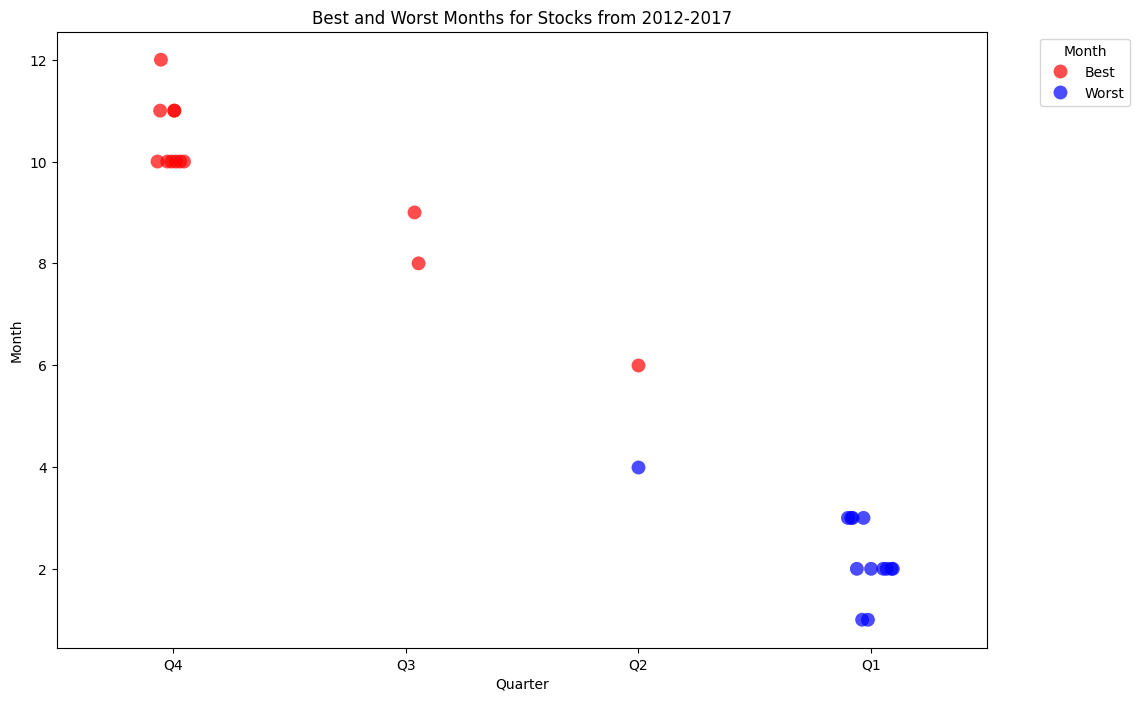

In [14]:
# combine the dataframes
month_df = pd.merge(max_month_df, min_month_df, on='Stock', how='left')

# plot a visualisation coloured by best & worst months
plt.figure(figsize=(12, 8))

sns.stripplot(data=month_df, x="Quarter_x", y="Month_x",
               hue="Type_x", dodge=True, s=10, palette={'Best': 'red'}, alpha=0.7)
sns.stripplot(data=month_df, x="Quarter_y", y="Month_y",
               hue="Type_y", dodge=True, s=10,  palette={'Worst': 'blue'}, alpha=0.7)

# add labels and title
plt.xlabel('Quarter')
plt.ylabel('Month')
plt.title('Best and Worst Months for Stocks from 2012-2017')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



#### Evaluation
- The scatterplot above provides a clear overview of seasonal patterns in stock prices, highlighting the `best` and `worst` months with the highest and lowest average prices respectively, together with its corresponding quarter from 2012-2017.
- The best months are concentrated in Q4 while the worst months are concentrated in Q1 across the chosen industries.
- The strong performance in Q4 could be attributed to increased consumer spending during the holiday season leading to a seasonal boost which results in positive earnings reports that can drive stock prices higher.
-  Conversely, the lower average prices in Q1 may not only reflect investors' reassessment of their portfolios after holiday spending but also the challenges faced by companies such as post-holiday sales decline or slow start in the new fiscal year which can negatively impact stock performance.
- Since earnings reports occur at the end of every quarter for US companies, it is possible that earnings report does contribute to the `best` and `worst` months of stock prices.

## EDA on ETFs from 2012-2017